<a href="https://colab.research.google.com/github/NIKITAKUMARI125/Alzheimer-disease-prediction--DEEP-LEARNING/blob/main/Alzheimer_disease_prediction_probability_code_ok_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
from tqdm import tqdm
from keras.metrics import Accuracy
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import cv2
import os
import statistics
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Input, Flatten, Dropout, Dense, BatchNormalization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.models import Model, Sequential
from sklearn import metrics

In [4]:
def load_data(dir_path, img_size=(256,256)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
# Replace this line with your actual data
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [6]:
# @title Default title text
Train_data = '/content/drive/MyDrive/train'
Test_data = '/content/drive/MyDrive/test'
img_size = (256,256)


In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [8]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      shear_range=0.1,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [9]:
 training_data = training_datagen.flow_from_directory(Train_data,
                                      target_size=(150, 150),
                                      batch_size=100,
                                      class_mode='binary')
training_data.class_indices

Found 3639 images belonging to 4 classes.


{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [10]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(Test_data,
                                  target_size=(150,150),
                                  batch_size=100,
                                  class_mode='binary')

Found 845 images belonging to 4 classes.


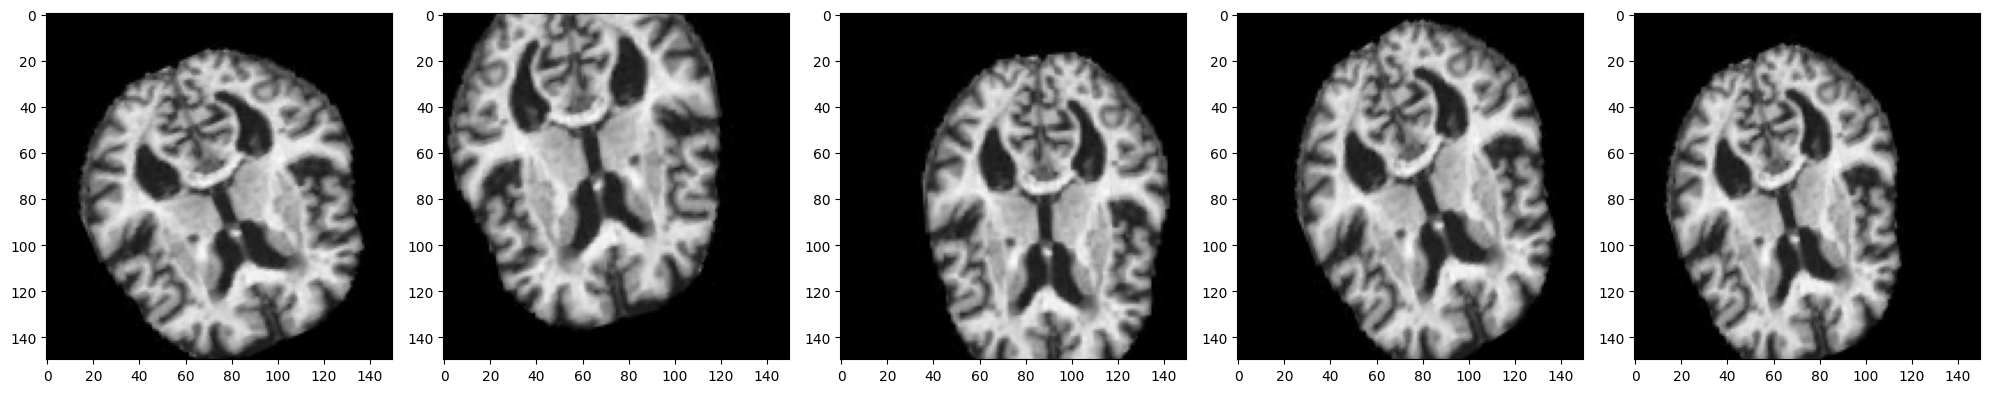

In [11]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


In [12]:
#cnn_model sir
model= Sequential()

model.add(Conv2D(32,(3,3),activation='relu', input_shape=(150, 150,3)))

model.add(Conv2D(64,(3,3), activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu' ))

model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Dropout(0.3))

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))

model.add(Conv2D(128, (3,3), activation='relu'))


model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3),activation='relu'))

model.add(Conv2D(256, (3,3), activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dropout (0.3))

model.add(Dense(4, activation='softmax'))

In [14]:
 #compile cnn model
model.compile(optimizer = Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# train cnn model
history = model.fit(training_data,
                          epochs=50,
                          verbose=1,
                          validation_data= valid_data
                         ) # time start 16.06

Epoch 1/50
37/37 [==============================] - 42s 982ms/step - loss: 0.8696 - accuracy: 0.5774 - val_loss: 1.1021 - val_accuracy: 0.5148
Epoch 2/50
37/37 [==============================] - 39s 1s/step - loss: 0.8615 - accuracy: 0.5848 - val_loss: 1.1418 - val_accuracy: 0.5148
Epoch 3/50
37/37 [==============================] - 38s 1s/step - loss: 0.8672 - accuracy: 0.5900 - val_loss: 1.1512 - val_accuracy: 0.5148
Epoch 4/50
37/37 [==============================] - 38s 1s/step - loss: 0.8705 - accuracy: 0.5815 - val_loss: 1.1242 - val_accuracy: 0.5148
Epoch 5/50
37/37 [==============================] - 38s 1s/step - loss: 0.8552 - accuracy: 0.5848 - val_loss: 1.1338 - val_accuracy: 0.5148
Epoch 6/50
37/37 [==============================] - 38s 1s/step - loss: 0.8598 - accuracy: 0.5818 - val_loss: 1.1162 - val_accuracy: 0.5148
Epoch 7/50
37/37 [==============================] - 40s 1s/step - loss: 0.8639 - accuracy: 0.5829 - val_loss: 1.1523 - val_accuracy: 0.5148
Epoch 8/50
37/37 

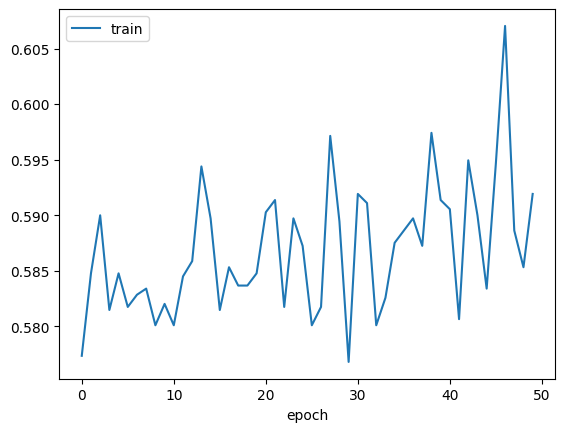

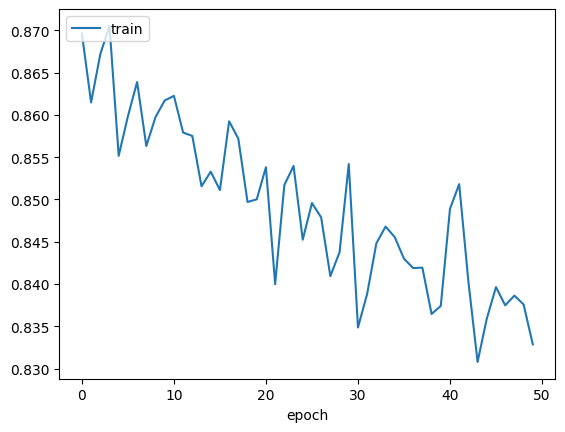

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#accuracy
import numpy
import sklearn.metrics

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative"]
y_pred = ["positive", "negative", "positive", "positive", "negative", "positive", "positive"]

r = sklearn.metrics.confusion_matrix(y_true, y_pred)

r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.5714285714285714


In [17]:
#calculate precision
import sklearn.metrics

y_true = ["positive", "positive", "positive", "negative", "negative", "negative"]
y_pred = ["positive", "positive", "negative", "positive", "negative", "negative"]

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label="positive")
print(precision)

0.6666666666666666


In [18]:
#calculate recall
import sklearn.metrics

y_true = ["positive", "positive", "positive", "negative", "negative", "negative"]
y_pred = ["positive", "positive", "negative", "positive", "negative", "negative"]

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label="positive")
print(recall)

0.6666666666666666


In [19]:
history.history

{'loss': [0.869604229927063,
  0.86147141456604,
  0.8671725392341614,
  0.8705100417137146,
  0.8551648259162903,
  0.8598319888114929,
  0.8638827204704285,
  0.8563237190246582,
  0.8597343564033508,
  0.8616988062858582,
  0.8622444272041321,
  0.8579084277153015,
  0.8575090765953064,
  0.8515602946281433,
  0.8532854318618774,
  0.8511188626289368,
  0.8592419028282166,
  0.8571814298629761,
  0.8497054576873779,
  0.8500174283981323,
  0.8538196682929993,
  0.8399938941001892,
  0.8517093658447266,
  0.8539626598358154,
  0.8452528119087219,
  0.849581241607666,
  0.8478796482086182,
  0.8409415483474731,
  0.8437690138816833,
  0.8541894555091858,
  0.834876298904419,
  0.8388482928276062,
  0.8448238372802734,
  0.8467984199523926,
  0.8455474972724915,
  0.8430048227310181,
  0.8418979048728943,
  0.8419476747512817,
  0.8364693522453308,
  0.8374208807945251,
  0.8488941788673401,
  0.8518139123916626,
  0.8403133153915405,
  0.8308056592941284,
  0.8359189033508301,
  0.839

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

AttributeError: 'Sequential' object has no attribute 'predict_classes'

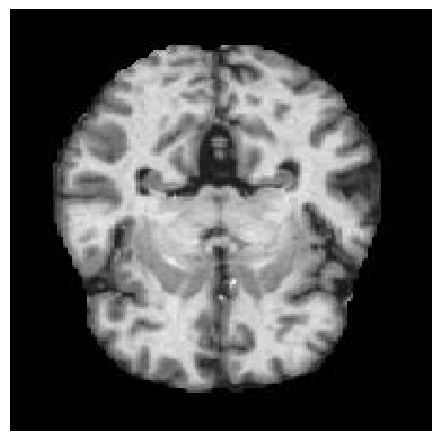

In [21]:
# Test Case 1: Non-Dementia
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread, imshow
dic =training_data.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/train/VeryMildDemented/verymildDem0.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 22ms/step
52.1 % chances are there that the image is NonDemented


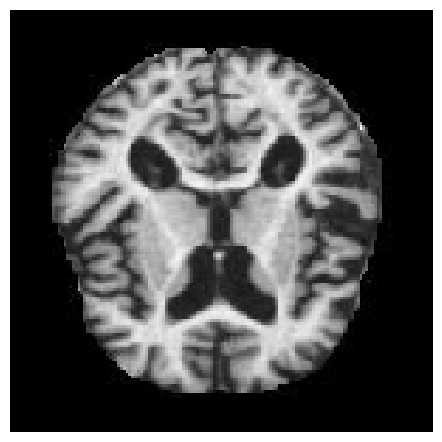

In [22]:
# Test Case : Non-Dementia / Very-Mild/ Mild / Moderate
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread, imshow
dic =training_data.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/train/ModerateDemented/moderateDem20.jpg', target_size = (150,150,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = np.argmax(model.predict(img))
probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer])

In [23]:
 Test Case 2: Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/train/MildDemented/mildDem106.jpg', target_size = (150,150,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

SyntaxError: invalid syntax (<ipython-input-23-31621f1c6381>, line 1)

1/1 [==============================] - 0s 19ms/step
53.02 % chances are there that the image is NonDemented


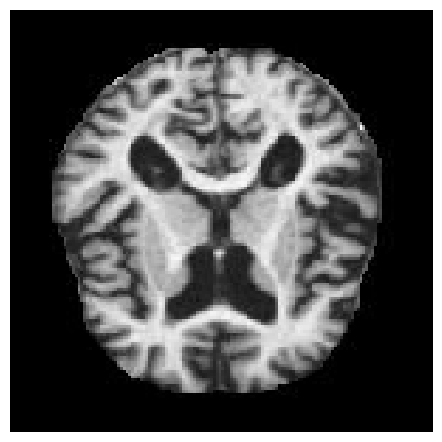

In [24]:
 #Test Case 3: Moderate Demented
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread, imshow
dic = training_data.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/train/ModerateDemented/moderateDem22.jpg', target_size = (150,150,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = np.argmax(model.predict(img))
probability = round(np.max(model.predict(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer])

In [25]:
# Test Case 4: Very Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/train/VeryMildDemented/verymildDem0.jpg', target_size = (150,150,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

NameError: name 'test_dataset' is not defined